<a href="https://colab.research.google.com/github/sttutie/Jungho-Shin/blob/main/Logistic%20regression%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

In [3]:
import tensorflow as tf
import random

In [40]:
df = pd.read_csv( "https://raw.githubusercontent.com/sttutie/Jungho-Shin/main/diabetes.csv", sep=',')

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [45]:
df = df.drop_duplicates()#중복 제거

In [46]:
df.Outcome.value_counts(normalize = True).mul(100)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

데이터 균형이 좀 맞지 않다.


In [12]:
cat_cols = [x for x in df.dtypes.index if df.dtypes[x] == 'object']

In [13]:
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

In [ ]:
pd.crosstab(df.smoking_history, df.diabetes, margins = True)

diabetes,0,1,All
smoking_history,,,
No Info,31442,1445,32887
current,8249,948,9197
ever,3526,472,3998
former,7709,1590,9299
never,31061,3337,34398
not current,5677,690,6367
All,87664,8482,96146


In [47]:
def visualize_outliers(df, column):
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_fence) | (df[column] > upper_fence)]
    return outliers

이상치

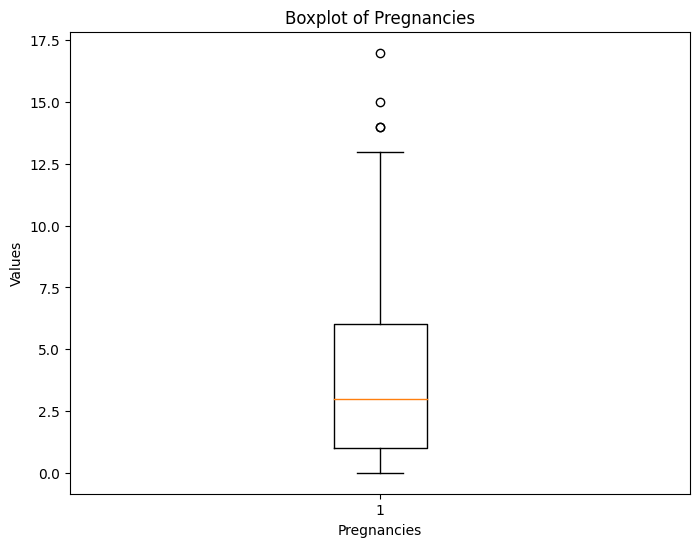

In [48]:
visualize_outliers(df, 'Pregnancies')

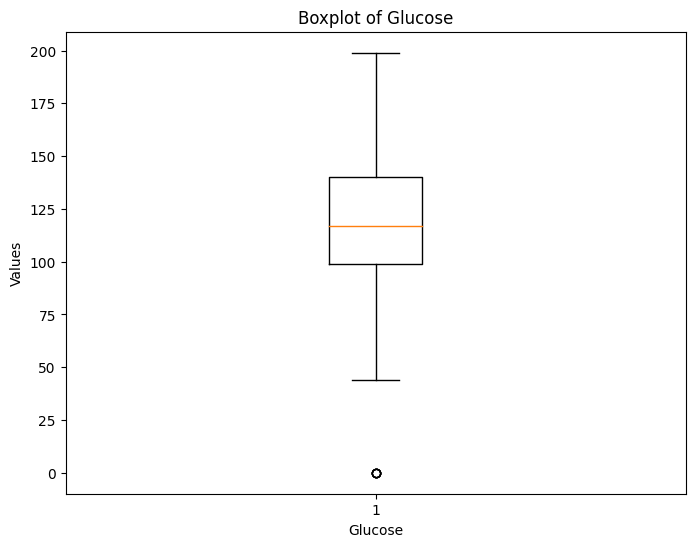

In [49]:
visualize_outliers(df, 'Glucose')

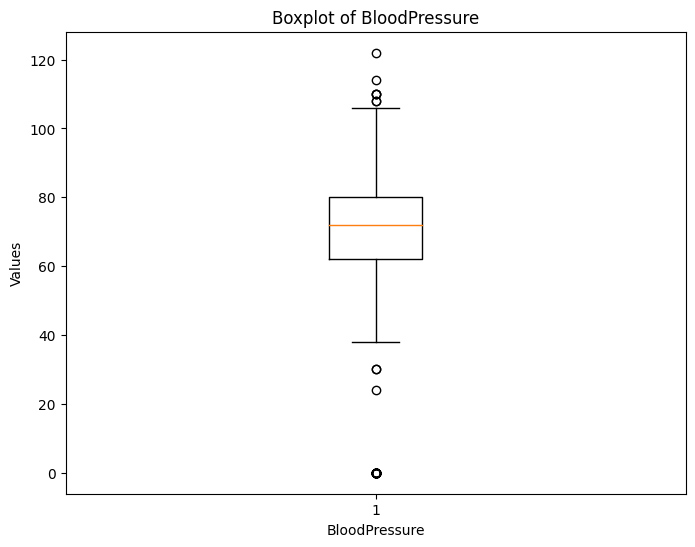

In [50]:
visualize_outliers(df, 'BloodPressure')

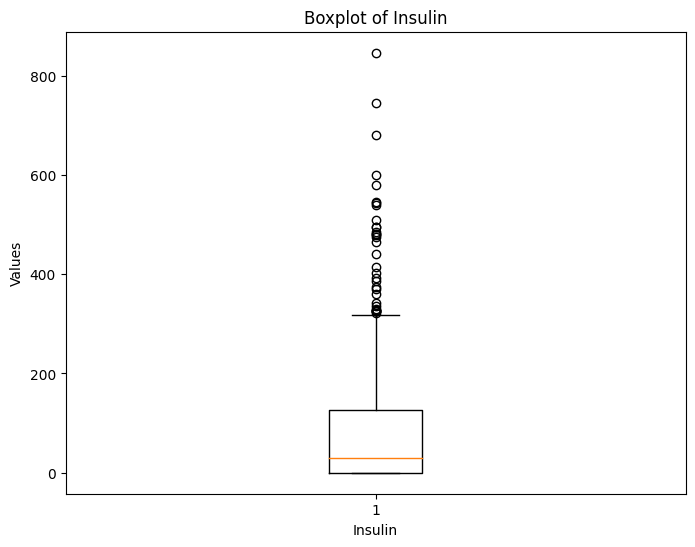

In [51]:
visualize_outliers(df, 'Insulin')

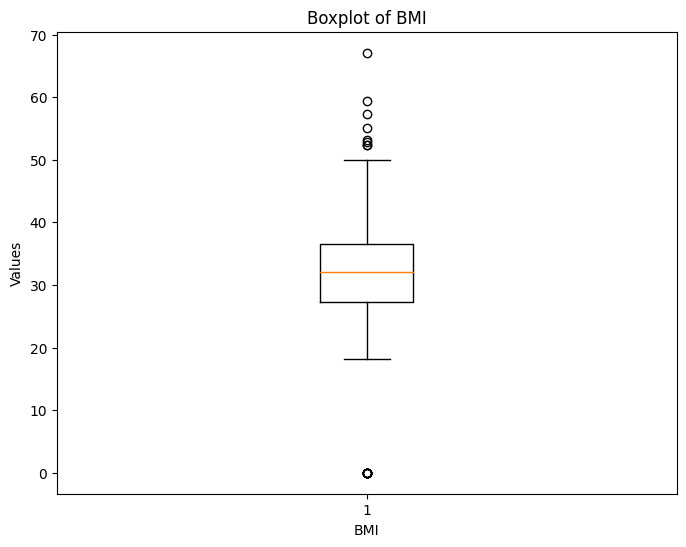

In [52]:
visualize_outliers(df, 'BMI')

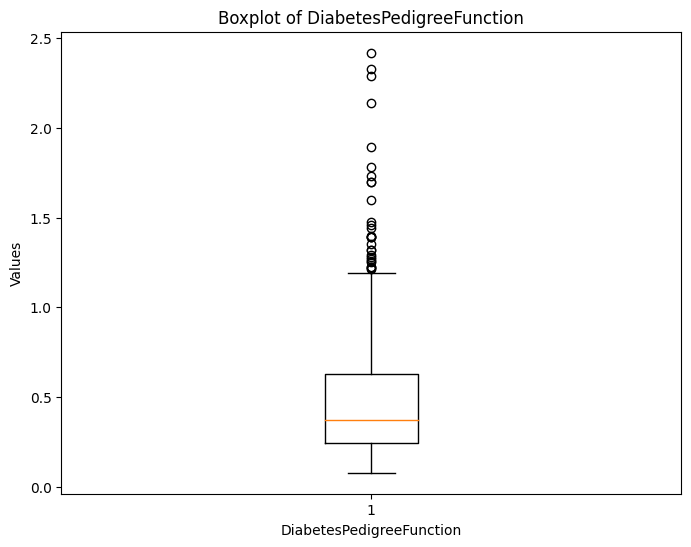

In [53]:
visualize_outliers(df, 'DiabetesPedigreeFunction')

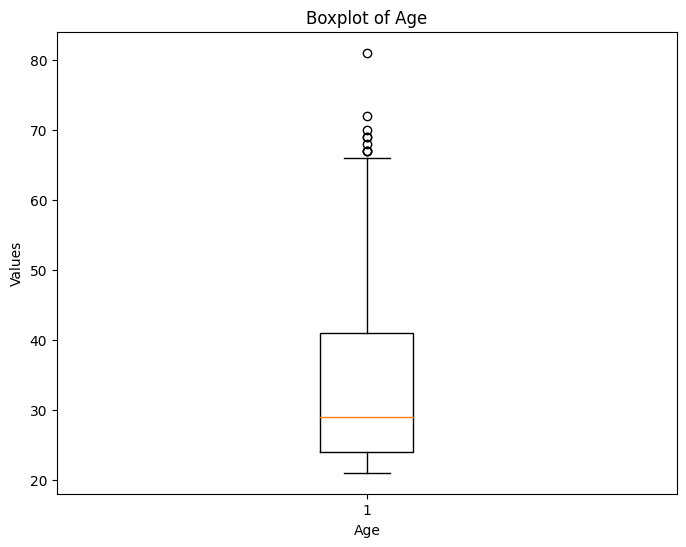

In [54]:
visualize_outliers(df, 'Age')

In [55]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)

PCA()

In [56]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio:")
print(np.cumsum(pca.explained_variance_ratio_))

Explained Variance Ratio:
[8.88533592e-01 6.15928850e-02 2.57897340e-02 1.30860309e-02
 7.44110616e-03 3.02662803e-03 5.12624608e-04 1.08526940e-05
 6.54609532e-06]

Cumulative Explained Variance Ratio:
[0.88853359 0.95012648 0.97591621 0.98900224 0.99644335 0.99946998
 0.9999826  0.99999345 1.        ]


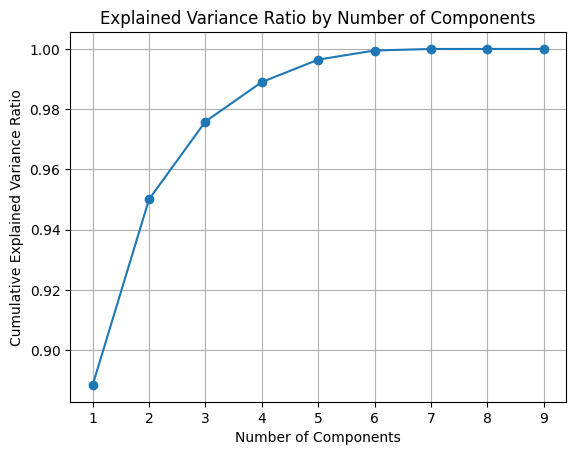

In [57]:
num_components = range(1, len(pca.explained_variance_ratio_) + 1)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(num_components, cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.xticks(num_components)
plt.grid(True)
plt.show()

차원 5개까지 줄이는 게 좋을 것 같다.

전처리

이상치 처리

In [167]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [170]:
print("y_train 샘플 수:", len(y_train))

y_train 샘플 수: 537


In [171]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [175]:
def replace_outliers_with_nan(data, column):
    outliers = detect_outliers(data, column)
    data.loc[outliers.index, column] = float('nan')

In [176]:
columns = ['Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose', 'Pregnancies']
for column in columns:
    replace_outliers_with_nan(X_train, column)

In [178]:
print("y_train 샘플 수:", len(y_train))
print("X_train 샘플 수:", len(X_train))

y_train 샘플 수: 537
X_train 샘플 수: 537


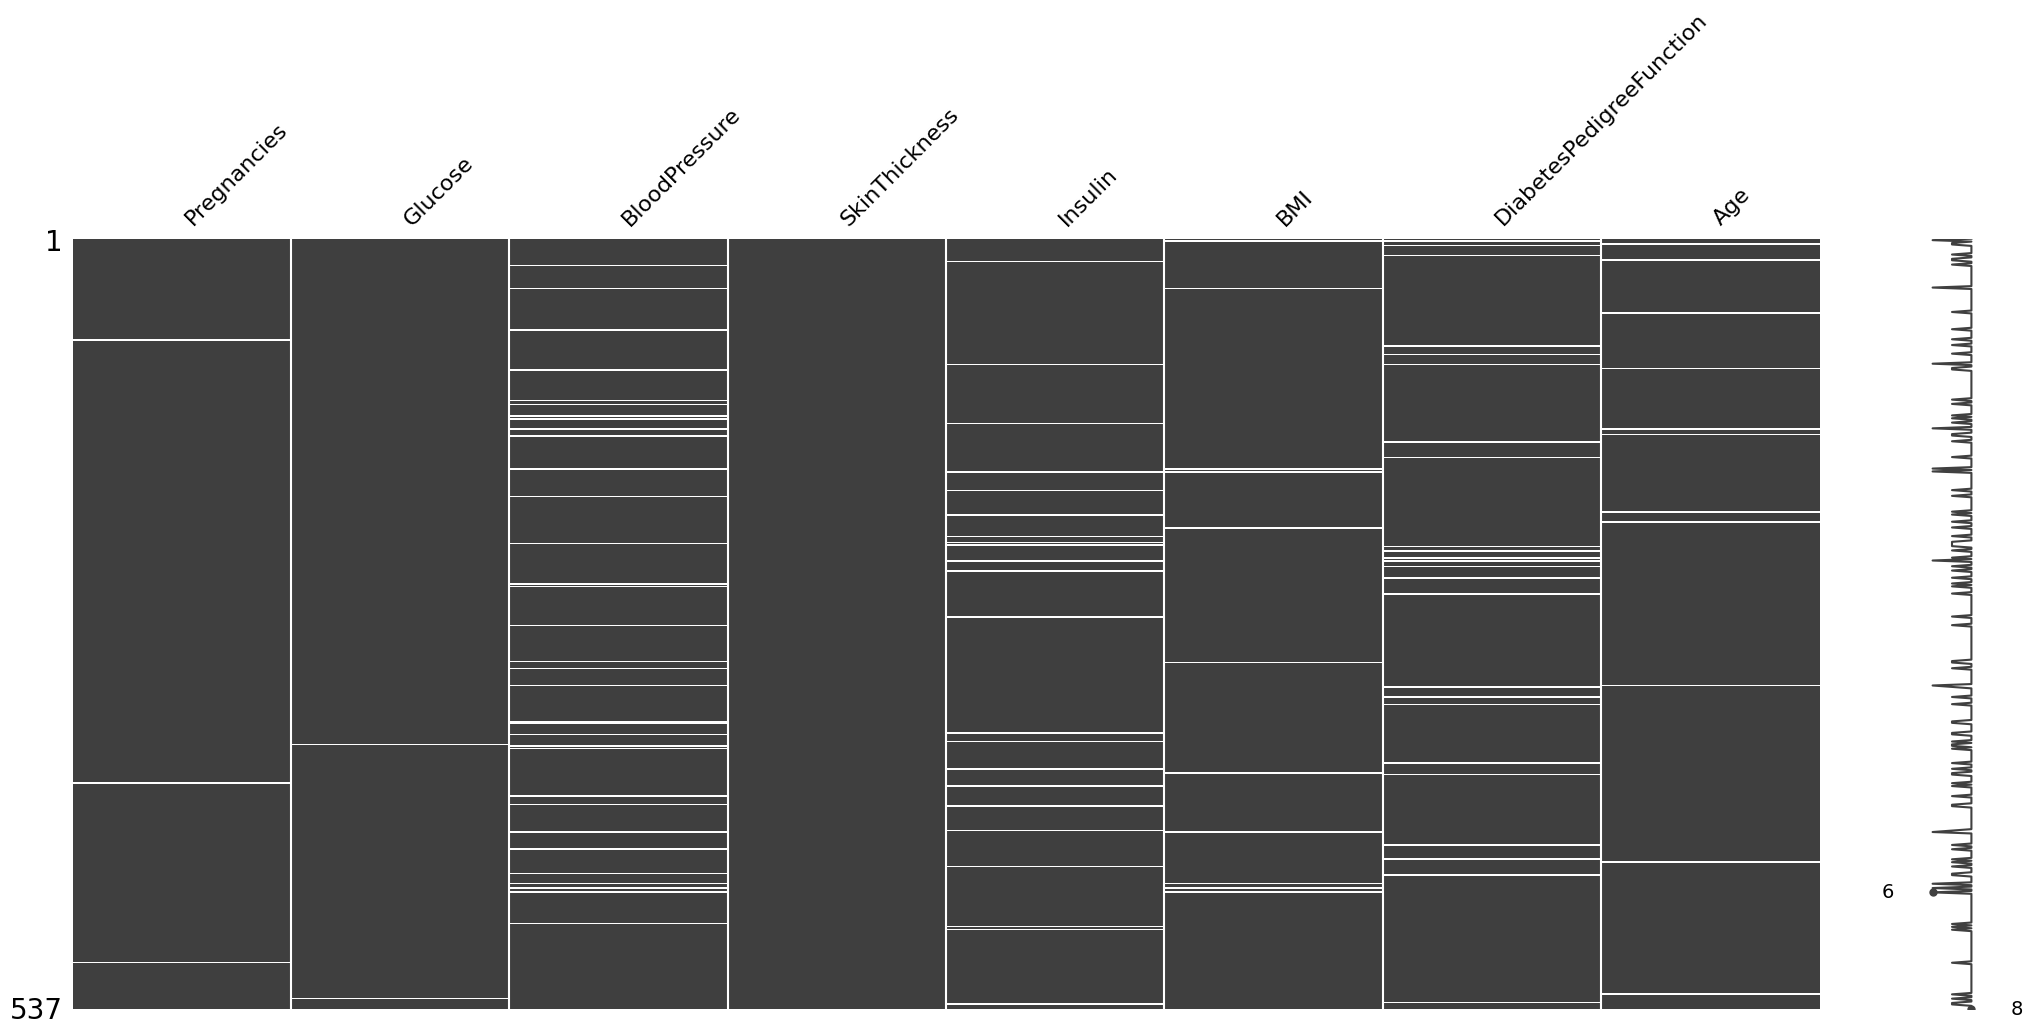

In [179]:
import missingno as msno
import matplotlib.pyplot as plt

df = df.replace('?', np.nan)

msno.matrix(X_train)
plt.show()

In [180]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# 결과 출력
print("Data with Imputed Values:")
print(X_train_imputed)

Data with Imputed Values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3.0     84.0           72.0           32.0      0.0  37.2   
1            0.0    118.0           64.0           23.0     89.0  32.3   
2           10.0     92.0           62.0            0.0      0.0  25.9   
3            2.0    158.0           90.0            0.0      0.0  31.6   
4           10.0    139.0           80.0            0.0      0.0  27.1   
..           ...      ...            ...            ...      ...   ...   
532          1.0     77.0           56.0           30.0     56.0  33.3   
533          8.0    124.0           76.0           24.0     55.8  28.7   
534          4.0    125.0           70.0           18.0    122.0  28.9   
535          3.0    116.0           74.0           15.0    105.0  26.3   
536          4.0    110.0           66.0            0.0      0.0  31.9   

     DiabetesPedigreeFunction   Age  
0                      0.2670  28.0  
1        

In [181]:
X_train_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.0,84.0,72.0,32.0,0.0,37.2,0.2670,28.0
1,0.0,118.0,64.0,23.0,89.0,32.3,0.5772,21.0
2,10.0,92.0,62.0,0.0,0.0,25.9,0.1670,31.0
3,2.0,158.0,90.0,0.0,0.0,31.6,0.8050,46.8
4,10.0,139.0,80.0,0.0,0.0,27.1,0.2254,57.0


이상치는 전부 Knn으로 채웠다.

In [182]:
X_train_imputed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

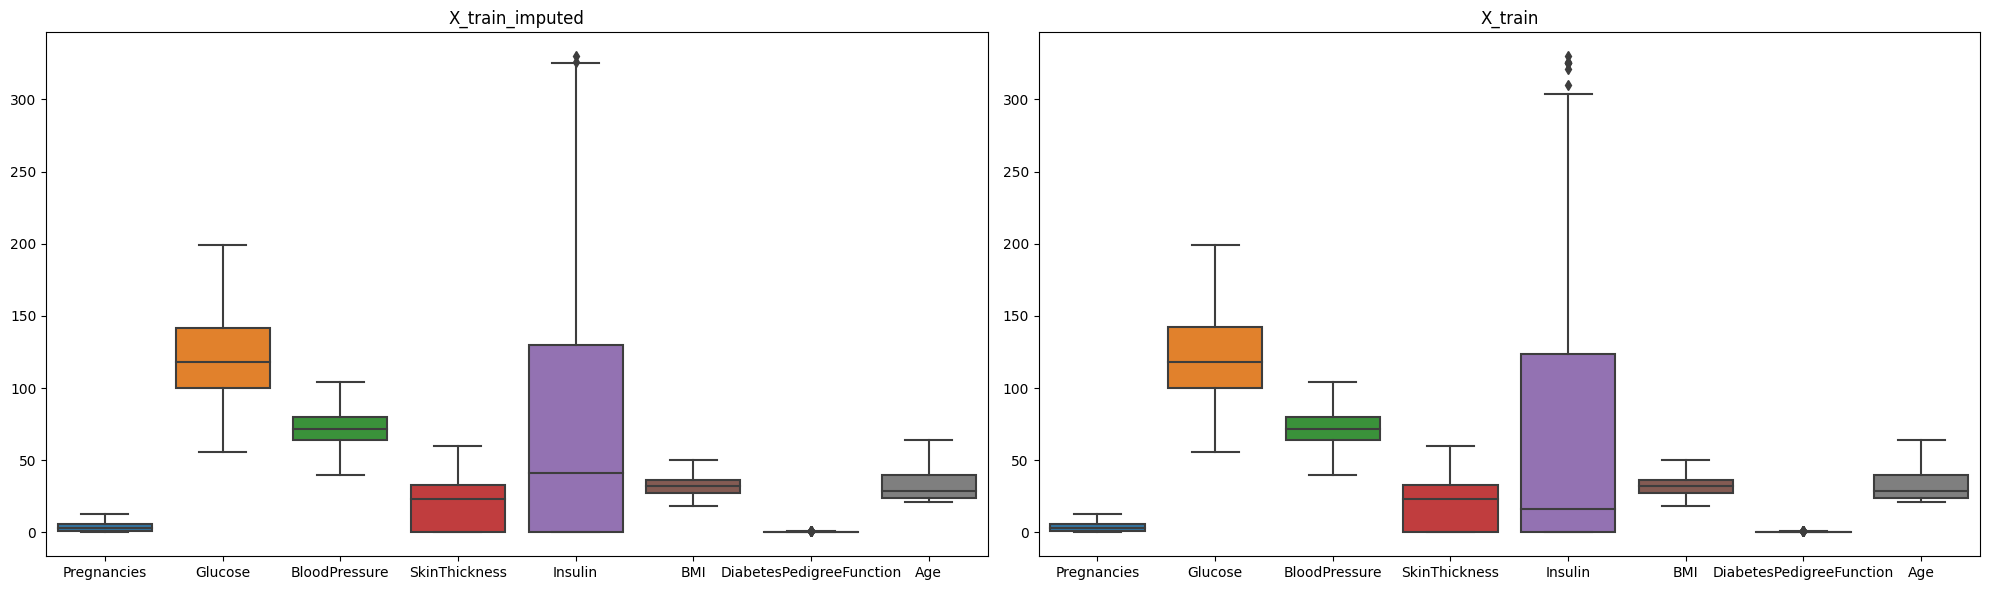

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_imputed)
plt.title('X_train_imputed')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train)
plt.title('X_train')
plt.tight_layout()
plt.show()

이상치가 어느정도 없어진 것 같다.

In [184]:
type(X_train_imputed)

pandas.core.frame.DataFrame

In [185]:
smote = SMOTE(random_state=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

X_train_imputed, y_train, X_test, y_test

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test)

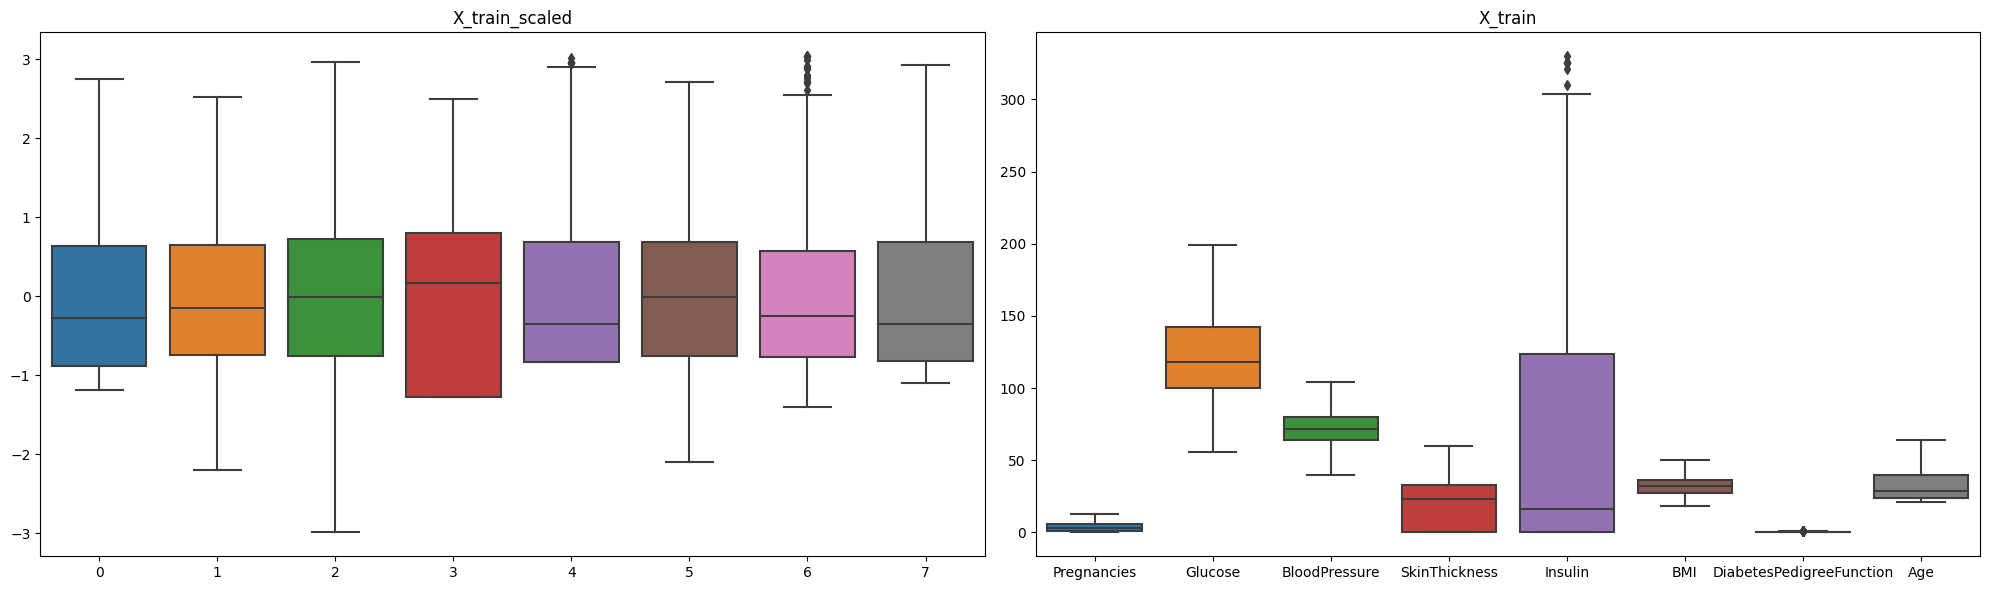

In [187]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_scaled)
plt.title('X_train_scaled')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train)
plt.title('X_train')
plt.tight_layout()
plt.show()

PCA

In [188]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_train_scaled)

PCA(n_components=5)

In [189]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

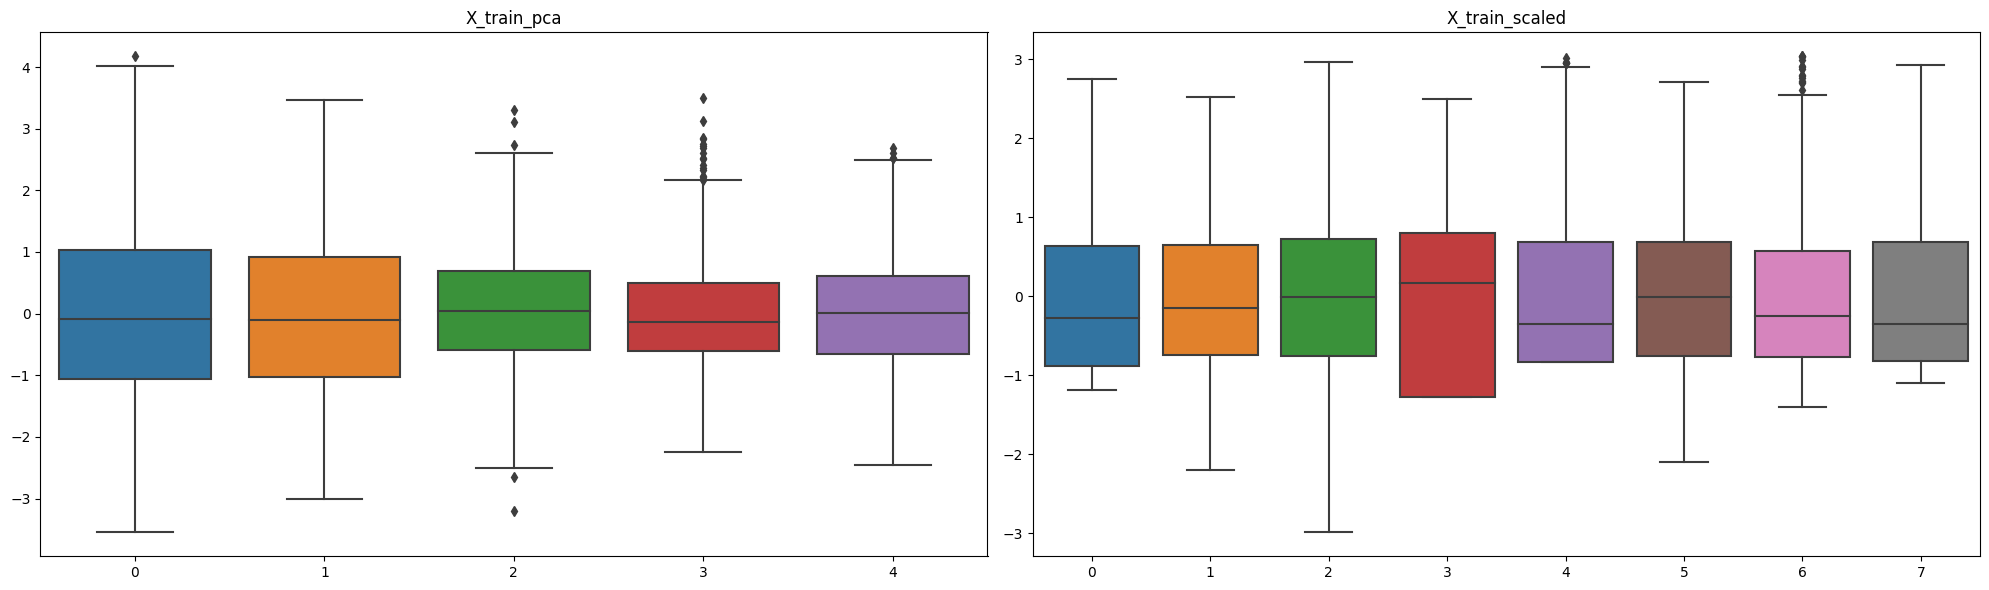

In [190]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_pca)
plt.title('X_train_pca')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train_scaled')
plt.tight_layout()
plt.show()

Logistic regression에 작동시키기

In [192]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

y_pred = logreg.predict(X_test_pca)

Predicted labels: [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 1 0 0]


In [194]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7186147186147186


PCA 없이

In [198]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_predt = logreg.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predt)

print("Accuracy:", accuracy)

Accuracy: 0.7445887445887446


In [195]:
from sklearn.metrics import roc_curve, roc_auc_score

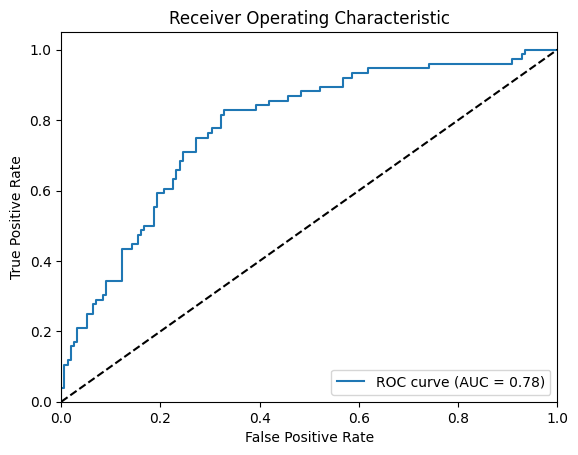

AUC: 0.7784380305602716


In [196]:
y_pred_p = logreg.predict_proba(X_test_pca)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p)

# AUC 계산
auc = roc_auc_score(y_test, y_pred_p)

# ROC 곡선 그리기
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# AUC 출력
print("AUC:", auc)

적당히 이쁘다.

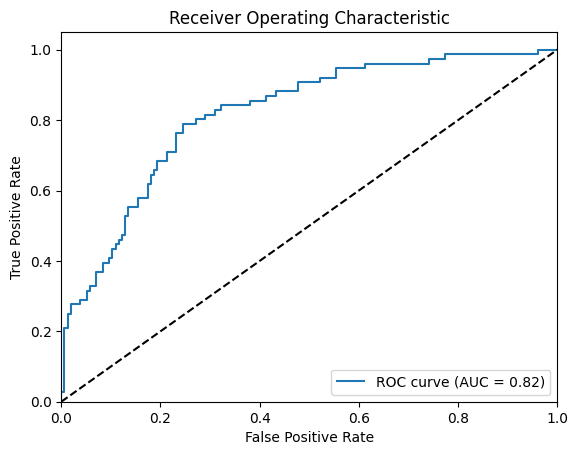

AUC: 0.8171477079796265


In [200]:
y_pred_pt = logreg.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_pt)

auc = roc_auc_score(y_test, y_pred_pt)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", auc)